In [1]:
import numpy as np
import decimal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import sympy as sp

In [2]:
def intializeContext(significantFigs,rounding) :
    #Intialize the context with specified signFigs and rounding/chopping
    decimal.getcontext().prec = significantFigs 
    if( rounding ) :
        decimal.getcontext().rounding = decimal.ROUND_HALF_UP
    else :
        decimal.getcontext().rounding = decimal.ROUND_DOWN 

In [3]:
def parse_exp(expr_str , var_name='x') :
    x = sp.symbols(var_name)
    expr = sp.sympify(expr_str)
    
    def decimal_func(x_decimal) :
        if not isinstance(x_decimal,decimal.Decimal) :
            x_decimal = decimal.Decimal(x_decimal)
            
        result = expr.evalf(decimal.getcontext().prec,subs={x:x_decimal})
        return decimal.Decimal(str(result))
    
    return decimal_func   

In [4]:
def parse_derivative(expr_str , var_name='x' ) :
    x = sp.symbols(var_name)
    expr = sp.sympify(expr_str)
    deriv = sp.diff(expr)
    
    def decimal_derv(x_decimal) :
        if not isinstance(x_decimal,decimal.Decimal) :
            x_decimal = decimal.Decimal(x_decimal)
        result = deriv.evalf(decimal.getcontext().prec,subs = {x:x_decimal})
        return decimal.Decimal(str(result))
    return decimal_derv
    

In [5]:
def NewtonRaphson(x0,func_expr,tol=1e-7 ,max_iter=100 , significantFigs = 14 , rounding = True):
    intializeContext(significantFigs,rounding=rounding)
    x_root = decimal.Decimal(x0)
    relativeError = decimal.Decimal("Infinity")
    func = parse_exp(func_expr)
    derivative = parse_derivative(func_expr)
    
    deriv_exp = str(sp.diff(sp.sympify(func_expr)))
    iteration_details = []
    iter = 0 
    for i in range(max_iter) :
        x_root_old = x_root
        x_root = x_root_old - (func(x_root_old) / derivative(x_root_old))
        if x_root != 0 and i != 0 :
            relativeError = abs(x_root-x_root_old)
            
        if func_expr != "" :
            expr_eval_str = f"{x_root_old}-(({func_expr.replace('x', str(x_root_old))})/ ({deriv_exp.replace('x', str(x_root_old))})) = {x_root}"
        else:
            expr_eval_str = str(x_root)    
            
        detials = {"iteration" : i+1,"x_root_old" : x_root_old, "x_root" : x_root , "Relative Error" : relativeError , "Evaluation" : expr_eval_str}
        
        iteration_details.append(detials)
        if relativeError <= tol :
            break 
    return x_root, iteration_details
        

In [6]:
root, table = NewtonRaphson(
    "1.5", 
    "x**2 -2", 
    tol=decimal.Decimal("1e-20"), 
    significantFigs=20
)
print("Root:", root)
for row in table:
    print(row)


Root: 1.4142135623730949780
{'iteration': 1, 'x_root_old': Decimal('1.5'), 'x_root': Decimal('1.4166666666666666667'), 'Relative Error': Decimal('Infinity'), 'Evaluation': '1.5-((1.5**2 -2)/ (2*1.5)) = 1.4166666666666666667'}
{'iteration': 2, 'x_root_old': Decimal('1.4166666666666666667'), 'x_root': Decimal('1.4142156862745097301'), 'Relative Error': Decimal('0.0024509803921569366'), 'Evaluation': '1.4166666666666666667-((1.4166666666666666667**2 -2)/ (2*1.4166666666666666667)) = 1.4142156862745097301'}
{'iteration': 3, 'x_root_old': Decimal('1.4142156862745097301'), 'x_root': Decimal('1.4142135623746899761'), 'Relative Error': Decimal('0.0000021238998197540'), 'Evaluation': '1.4142156862745097301-((1.4142156862745097301**2 -2)/ (2*1.4142156862745097301)) = 1.4142135623746899761'}
{'iteration': 4, 'x_root_old': Decimal('1.4142135623746899761'), 'x_root': Decimal('1.4142135623730951551'), 'Relative Error': Decimal('1.5948210E-12'), 'Evaluation': '1.4142135623746899761-((1.41421356237468

In [7]:
def string_to_function(expr_str, var_name='x', module='math'):
    """
    Convert a string expression into a callable function f(x).

    Parameters
    ----------
    expr_str : str
        The mathematical expression in terms of `var_name`, e.g. "cos(x)+x**2".
    var_name : str
        The variable name used in the expression (default 'x').
    module : str
        Which backend to use for numerical evaluation:
         - 'math'   -> Python math (fast, double precision floats)
         - 'mpmath' -> mpmath (arbitrary precision, use mp.mpf values)
         - 'numpy'  -> numpy (vectorized, arrays)
    Returns
    -------
    function
        A callable f(x) that evaluates the expression.
    """
    # 1) Create a symbolic variable
    x = sp.symbols(var_name)

    # 2) Parse the string into a SymPy expression (raises on invalid input)
    expr = sp.sympify(expr_str)

    # 3) Choose module for lambdify
    if module == 'mpmath':
        # use mpmath for higher precision arithmetic
        numeric_module = 'mpmath'
    elif module == 'numpy':
        numeric_module = 'numpy'
    else:
        numeric_module = 'math'   # default: Python math (float)

    # 4) Create a fast callable from the symbolic expression
    f = sp.lambdify(x, expr, modules=numeric_module)

    return f

Number of iterations: 8
Total frames: 480
Animation saved as 'newton_raphson_animation.gif'
Animation saved as 'newton_raphson_animation.gif'


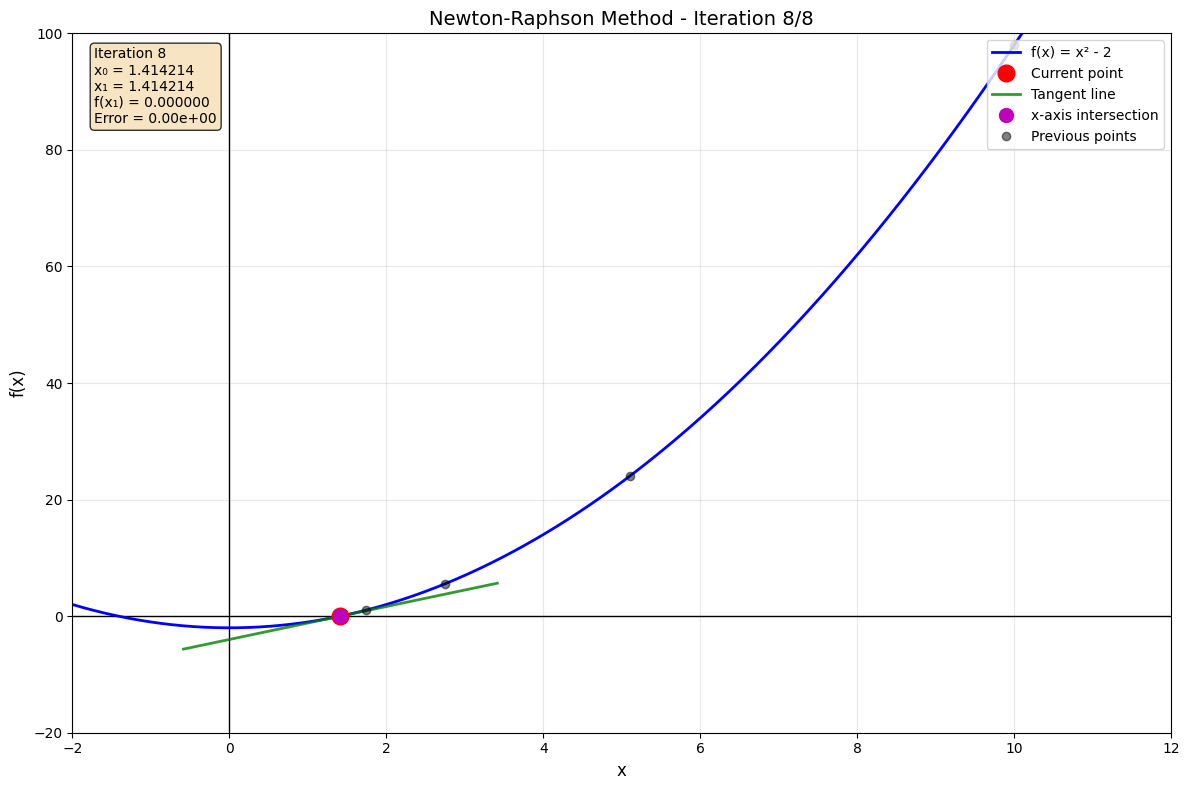

In [8]:
func5_str = "x**2-2"
root5, details5 = NewtonRaphson(
    "10",
    func5_str,
    tol=decimal.Decimal("1e-10"),
    significantFigs=14
)
func5 = string_to_function(func5_str)
func5_der = string_to_function("2*x")

# Extract iteration data
x_vals = [float(d["x_root"]) for d in details5]
x_old_vals = [float(d["x_root_old"]) for d in details5]

# Animation phases per iteration:
# Phase 1: Draw tangent line (frames 0-19)
# Phase 2: Move point along tangent to x-axis (frames 20-39)
# Phase 3: Move point vertically to curve (frames 40-59)
frames_per_phase = 20
phases = 3
frames_per_iter = frames_per_phase * phases
total_frames = len(details5) * frames_per_iter

# ---------------------------
# Setup plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot range
x_min, x_max = -2, 12
y_min, y_max = -20, 100
x_plot = np.linspace(x_min, x_max, 500)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.axhline(0, color='black', lw=1, ls='-')
ax.axvline(0, color='black', lw=1, ls='-')
ax.plot(x_plot, func5(x_plot), 'b-', lw=2, label="f(x) = x² - 2")

# Animation elements
point, = ax.plot([], [], 'ro', markersize=12, zorder=5, label="Current point")
tangent_line, = ax.plot([], [], 'g-', lw=2, alpha=0.8, label="Tangent line")
intersection_point, = ax.plot([], [], 'mo', markersize=10, zorder=5, label="x-axis intersection")
vertical_line, = ax.plot([], [], 'm--', lw=1.5, alpha=0.7)
history_points, = ax.plot([], [], 'ko', markersize=6, alpha=0.5, label="Previous points")

# Store history
history_x = []
history_y = []

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Newton-Raphson Method Animation', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Text annotation for current values
info_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

print(f"Number of iterations: {len(details5)}")
print(f"Total frames: {total_frames}")

def ease_in_out(t):
    """Smooth easing function for animation"""
    return t * t * (3 - 2 * t)

def update(frame):
    global history_x, history_y
    
    # Determine current iteration and phase
    iter_idx = frame // frames_per_iter
    frame_in_iter = frame % frames_per_iter
    phase = frame_in_iter // frames_per_phase
    t = (frame_in_iter % frames_per_phase) / frames_per_phase
    t_smooth = ease_in_out(t)
    
    # Clamp iteration index
    if iter_idx >= len(details5):
        iter_idx = len(details5) - 1
        phase = 2
        t_smooth = 1.0
    
    x_old = float(details5[iter_idx]["x_root_old"])
    x_new = float(details5[iter_idx]["x_root"])
    f_old = func5(x_old)
    deriv = func5_der(x_old)
    
    # Calculate tangent line endpoints
    tangent_x_min = min(x_new - 1, x_old - 2)
    tangent_x_max = max(x_new + 1, x_old + 2)
    
    if phase == 0:
        # Phase 1: Draw tangent line progressively
        tangent_progress = t_smooth
        x_tang_start = x_old
        x_tang_end = x_old + tangent_progress * (tangent_x_max - x_old)
        x_tang_start_left = x_old - tangent_progress * (x_old - tangent_x_min)
        
        x_tangent = np.array([x_tang_start_left, x_tang_end])
        y_tangent = f_old + deriv * (x_tangent - x_old)
        
        tangent_line.set_data(x_tangent, y_tangent)
        point.set_data([x_old], [f_old])
        intersection_point.set_data([], [])
        vertical_line.set_data([], [])
        
        info_text.set_text(f'Iteration {iter_idx + 1}\n'
                          f'x₀ = {x_old:.6f}\n'
                          f'f(x₀) = {f_old:.6f}\n'
                          f"f'(x₀) = {deriv:.6f}\n"
                          f'Drawing tangent...')
        
    elif phase == 1:
        # Phase 2: Move point along tangent to x-axis
        # Full tangent line
        x_tangent = np.linspace(tangent_x_min, tangent_x_max, 100)
        y_tangent = f_old + deriv * (x_tangent - x_old)
        tangent_line.set_data(x_tangent, y_tangent)
        
        # Point moves from (x_old, f_old) to (x_new, 0)
        curr_x = x_old + t_smooth * (x_new - x_old)
        curr_y = f_old + t_smooth * (0 - f_old)
        
        point.set_data([curr_x], [curr_y])
        
        # Show intersection point when we reach it
        if t_smooth > 0.9:
            intersection_point.set_data([x_new], [0])
        else:
            intersection_point.set_data([], [])
        vertical_line.set_data([], [])
        
        info_text.set_text(f'Iteration {iter_idx + 1}\n'
                          f'x₀ = {x_old:.6f}\n'
                          f'f(x₀) = {f_old:.6f}\n'
                          f'Moving to x-intercept...\n'
                          f'x₁ = x₀ - f(x₀)/f\'(x₀)')
        
    else:
        # Phase 3: Move point vertically from x-axis to curve
        x_tangent = np.linspace(tangent_x_min, tangent_x_max, 100)
        y_tangent = f_old + deriv * (x_tangent - x_old)
        tangent_line.set_data(x_tangent, y_tangent)
        
        f_new = func5(x_new)
        curr_y = 0 + t_smooth * f_new
        
        point.set_data([x_new], [curr_y])
        intersection_point.set_data([x_new], [0])
        
        # Draw vertical line from x-axis to current point
        vertical_line.set_data([x_new, x_new], [0, curr_y])
        
        # Add to history when phase completes
        if t_smooth >= 0.95 and (len(history_x) == 0 or history_x[-1] != x_old):
            history_x.append(x_old)
            history_y.append(f_old)
        
        info_text.set_text(f'Iteration {iter_idx + 1}\n'
                          f'x₀ = {x_old:.6f}\n'
                          f'x₁ = {x_new:.6f}\n'
                          f'f(x₁) = {f_new:.6f}\n'
                          f'Error = {abs(x_new - x_old):.2e}')
    
    # Update history points
    if history_x:
        history_points.set_data(history_x, history_y)
    
    ax.set_title(f'Newton-Raphson Method - Iteration {iter_idx + 1}/{len(details5)}', fontsize=14)
    
    return point, tangent_line, intersection_point, vertical_line, history_points, info_text

# Reset history for fresh animation
history_x = []
history_y = []

# ---------------------------
# Create animation
anim = FuncAnimation(
    fig,
    update,
    frames=total_frames,
    interval=50,  # 20 fps for smoother viewing
    blit=True,
    repeat=True
)

plt.tight_layout()

# Save GIF
anim.save('newton_raphson_animation.gif', writer='pillow', fps=20)
print("Animation saved as 'newton_raphson_animation.gif'")

In [9]:
root , details = NewtonRaphson(1, "x**3 +2*x -5", tol=decimal.Decimal("1e-10"), significantFigs=14)
print("Root:", root)
for row in details:
    print(row)

Root: 1.3282688556686
{'iteration': 1, 'x_root_old': Decimal('1'), 'x_root': Decimal('1.4'), 'Relative Error': Decimal('Infinity'), 'Evaluation': '1-((1**3 +2*1 -5)/ (3*1**2 + 2)) = 1.4'}
{'iteration': 2, 'x_root_old': Decimal('1.4'), 'x_root': Decimal('1.3309644670051'), 'Relative Error': Decimal('0.0690355329949'), 'Evaluation': '1.4-((1.4**3 +2*1.4 -5)/ (3*1.4**2 + 2)) = 1.3309644670051'}
{'iteration': 3, 'x_root_old': Decimal('1.3309644670051'), 'x_root': Decimal('1.3282728196382'), 'Relative Error': Decimal('0.0026916473669'), 'Evaluation': '1.3309644670051-((1.3309644670051**3 +2*1.3309644670051 -5)/ (3*1.3309644670051**2 + 2)) = 1.3282728196382'}
{'iteration': 4, 'x_root_old': Decimal('1.3282728196382'), 'x_root': Decimal('1.3282688556772'), 'Relative Error': Decimal('0.0000039639610'), 'Evaluation': '1.3282728196382-((1.3282728196382**3 +2*1.3282728196382 -5)/ (3*1.3282728196382**2 + 2)) = 1.3282688556772'}
{'iteration': 5, 'x_root_old': Decimal('1.3282688556772'), 'x_root': De